<a href="https://colab.research.google.com/github/Sakthiprian/Time-Series-Forecasting/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/MyDrive/MyDrive/AXISBANK.csv',index_col=0)
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [ ]:
df.shape

(5306, 14)

In [ ]:
df.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

Since Trades, Deliverables and %Deliverables are not of interest, we can drop them.

In [ ]:
df.drop(columns=["Trades","Deliverable Volume","%Deliverble"],inplace=True)

In [ ]:
open=df['Open']
close=df['Close']
volume=df['VWAP']
high=df["High"]
low=df["Low"]

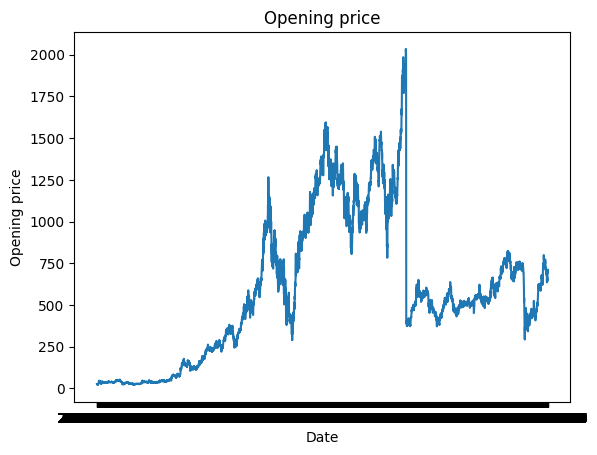

In [ ]:
plt.plot(df.index,open)
plt.title("Opening price")
plt.xlabel("Date")
plt.ylabel("Opening price")
plt.show()

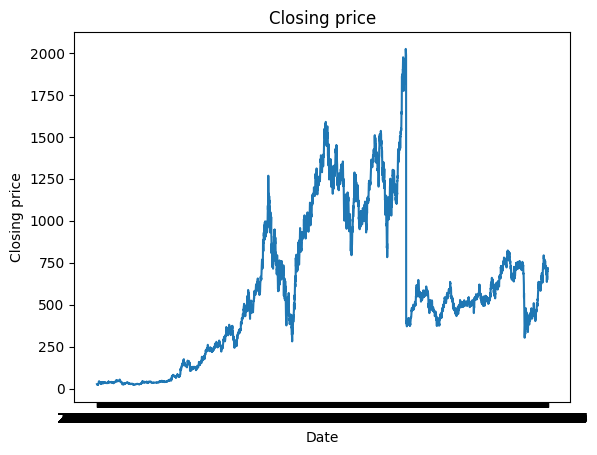

In [ ]:
plt.plot(df.index,close)
plt.title("Closing price")
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.show()

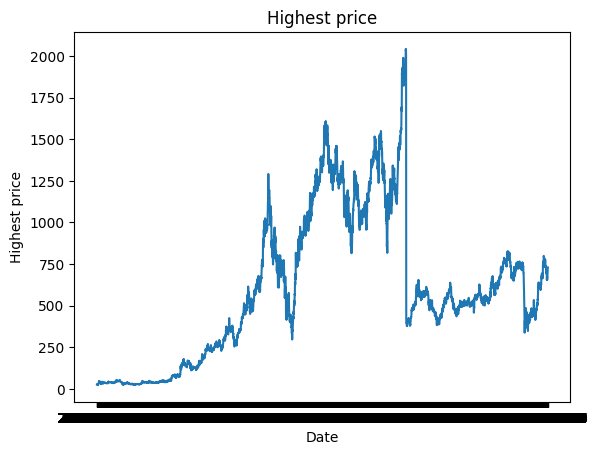

In [ ]:
plt.plot(df.index,high)
plt.title("Highest price")
plt.xlabel("Date")
plt.ylabel("Highest price")
plt.show()

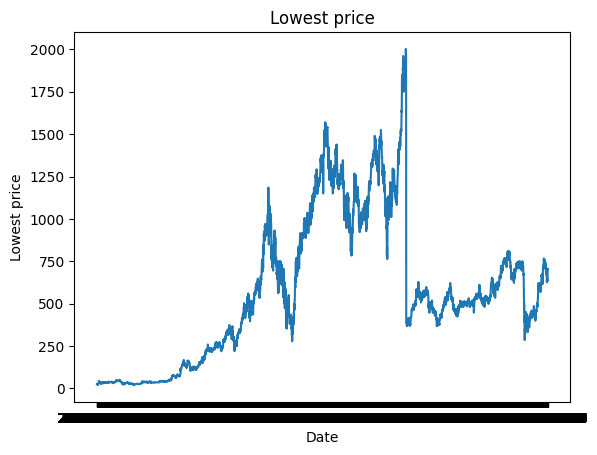

In [ ]:
plt.plot(df.index,low)
plt.title("Lowest price")
plt.xlabel("Date")
plt.ylabel("Lowest price")
plt.show()

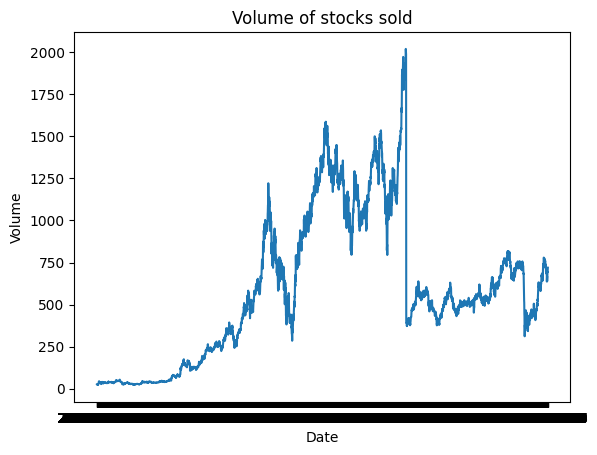

In [ ]:
plt.plot(df.index,volume)
plt.title("Volume of stocks sold")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

In [ ]:
date=pd.DataFrame()
date["Dates"]=pd.to_datetime(df.index)
date["Dates"].dtype

dtype('<M8[ns]')

In [ ]:
features=pd.DataFrame()
features=df[["High","Low","Open","Close","Volume"]]
features["Volume"].astype(float)
features.head()

,High,Low,Open,Close,Volume
Date,,,,,
2000-01-03,26.70,26.70,26.7,26.70,112100
2000-01-04,28.70,26.50,27.0,26.85,234500
2000-01-05,27.75,25.50,26.0,26.30,170100
2000-01-06,27.00,25.80,25.8,25.95,102100
2000-01-07,26.00,24.25,25.0,24.80,62600


In [ ]:
scaler=StandardScaler()
scale=scaler.fit(features)

In [ ]:
features_scaled=scaler.transform(features)

In [ ]:
X_train=[]
Y_train=[]
seqlen=15

for i in range(seqlen,len(features_scaled)):
  X_train.append(features_scaled[i-seqlen:i,0:features.shape[0]])
  Y_train.append(features_scaled[i:i+1,0])

X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_train.shape

(5291, 15, 5)

In [ ]:

model=Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
model.add(LSTM(32,activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1]))

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 15, 64)            17920     
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30369 (118.63 KB)
Trainable params: 30369 (118.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
265/265 [==============================] - 19s 73ms/step - loss: 0.0492 - val_loss: 0.0197
Epoch 2/10
265/265 [==============================] - 18s 66ms/step - loss: 0.0363 - val_loss: 0.0085
Epoch 3/10
265/265 [==============================] - 18s 69ms/step - loss: 0.0405 - val_loss: 0.0078
Epoch 4/10
265/265 [==============================] - 17s 63ms/step - loss: 0.0400 - val_loss: 0.0098
Epoch 5/10
265/265 [==============================] - 17s 62ms/step - loss: 0.0357 - val_loss: 0.0050
Epoch 6/10
265/265 [==============================] - 18s 68ms/step - loss: 0.0319 - val_loss: 0.0069
Epoch 7/10
265/265 [==============================] - 17s 65ms/step - loss: 0.0360 - val_loss: 0.0053
Epoch 8/10
265/265 [==============================] - 17s 64ms/step - loss: 0.0306 - val_loss: 0.0043
Epoch 9/10
265/265 [==============================] - 17s 64ms/step - loss: 0.0355 - val_loss: 0.0034
Epoch 10/10
265/265 [==============================] - 17s 64ms/step - loss: 0.035

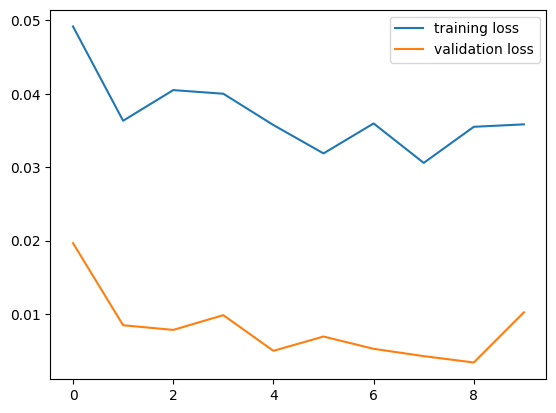

In [ ]:
timeseries= model.fit(X_train,Y_train,epochs=10,batch_size=16,validation_split=0.2,verbose=1)
plt.plot(timeseries.history["loss"],label="training loss")
plt.plot(timeseries.history["val_loss"],label="validation loss")
plt.legend()

In [116]:
days=45
date=date["Dates"].tolist()


TypeError: ignored

In [ ]:
dates_forecast= pd.date_range(list(date)[-1], periods = days, freq='1d' ).tolist()

In [ ]:
forecast=model.predict(X_train[-days:])

2/2 [==============================] - 0s 12ms/step


once the forecast is done, we need to perform the inverse scaling and add the forecast part to the original dataframe.

In [ ]:
forecast.shape

(45, 1)

In [ ]:
forecast

array([[0.4774337 ],
       [0.4431169 ],
       [0.4067531 ],
       [0.39342546],
       [0.38511553],
       [0.36892936],
       [0.38078895],
       [0.37355158],
       [0.3774533 ],
       [0.36894667],
       [0.3639909 ],
       [0.37360707],
       [0.38781095],
       [0.4148304 ],
       [0.43646532],
       [0.4265706 ],
       [0.43418914],
       [0.41624424],
       [0.39020267],
       [0.3605911 ],
       [0.3590246 ],
       [0.36003336],
       [0.35413796],
       [0.32389486],
       [0.318631  ],
       [0.2897107 ],
       [0.2915764 ],
       [0.29944026],
       [0.2844838 ],
       [0.26688343],
       [0.24706227],
       [0.2390024 ],
       [0.21853489],
       [0.17437384],
       [0.15194604],
       [0.14776869],
       [0.16107076],
       [0.14830531],
       [0.15477839],
       [0.14106873],
       [0.1539458 ],
       [0.18457702],
       [0.17619815],
       [0.17534326],
       [0.2313162 ]], dtype=float32)

In [ ]:
prediction_copies = np.repeat(forecast, features.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
y_pred_future


array([807.9808 , 792.7783 , 776.66907, 770.7649 , 767.08356, 759.913  ,
       765.1669 , 761.9607 , 763.68915, 759.9207 , 757.7253 , 761.9853 ,
       768.27765, 780.2473 , 789.83167, 785.4483 , 788.8233 , 780.87366,
       769.33716, 756.2192 , 755.5252 , 755.9721 , 753.3604 , 739.9626 ,
       737.6307 , 724.8189 , 725.64545, 729.12915, 722.50336, 714.70636,
       705.92554, 702.355  , 693.28784, 673.7243 , 663.78876, 661.9382 ,
       667.83105, 662.1759 , 665.0435 , 658.9701 , 664.6746 , 678.2444 ,
       674.53253, 674.1538 , 698.94995], dtype=float32)

<Axes: >

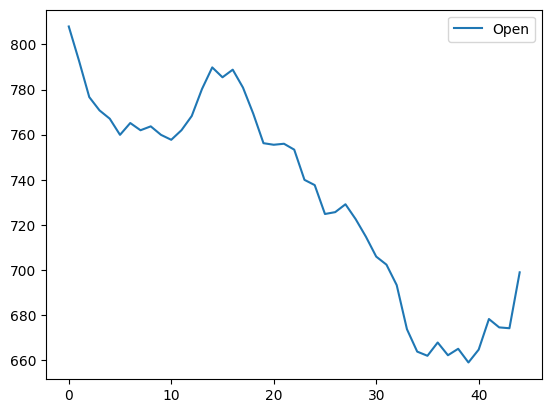

In [118]:
import seaborn as sb

df_forecast = pd.DataFrame({ 'Open':y_pred_future})

sb.lineplot(df_forecast)